# LoL Predictor

## Dataset

> Le set de donnée que nous avons choisi est [League Of Legends High Elo Ranked Games](https://www.kaggle.com/gyejr95/league-of-legends-challenger-ranked-games2020). 

> Ce set de donnée représente les données de 26 000 parties des meilleurs joueurs (Challenger) de League Of Legends, 65 000 parties des 2nds meilleurs (Grand Master) joueurs et 100 000 parties des 3ème meilleurs (Master).

> League Of Legends est un jeu de 5vs5 consistant à détruire la base de l'autre en contrôlant des champions qui sont choisis avant le début de la partie. En éliminant les joueurs adverses ou minions/objectifs, les joueurs remportent de l'expérience leur permettant d'augmenter de niveau et aussi de l'argent ce qui leur permet d'acheter de l'équipement.

> En accomplissant des objectifs, une équipe a plus de chance de gagner la partie. 

> Nous allons essayer de prédire si une équipe va gagner en fonction de son état dans la partie.

## Data

> Une ligne de données est composé en deux parties : 

* Equipe bleu
* Equipe rouge

> Ces deux ensembles sont composés des mêmes colonnes, plus loin nous étudierons seulement l'équipe bleu.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, classification_report

import seaborn as sns
import matplotlib as mpl
import matplotlib . pyplot as plt

import pprint
import functools

In [2]:
# Import challenger and grandmaster data
dir = 'data/'
ranks = ['master', 'grand_master', 'challenger']

merged_data = pd.DataFrame()

for rank in ranks:
    data_in = pd.read_csv(dir+rank+'.csv')
    data_in['rank'] = rank
    print(f"Length of {rank} data : {len(data_in)}")
    merged_data = merged_data.append(data_in, ignore_index=True)
    
print(f"Length of merged data : {len(merged_data)}")
merged_data.head()

Length of master data : 107125
Length of grand_master data : 65896
Length of challenger data : 26904
Length of merged data : 199925


,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,rank
0,4227123625,1429,0,1,1,0,0,0,0,0,...,53831,41991,609,64,12.8,127,4,12916,26338,master
1,4219545724,1313,0,0,1,0,0,0,0,0,...,52924,39672,510,63,12.6,133,4,12252,29828,master
2,4219463634,1660,1,0,0,1,1,1,1,1,...,61745,46516,630,65,13.0,153,2,17005,37066,master
3,4205778093,984,1,1,1,0,1,0,2,0,...,25007,21444,304,41,8.2,51,1,10499,3085,master
4,4201063474,1437,0,1,1,0,1,0,2,0,...,71794,45798,565,68,13.6,150,7,47523,47150,master


In [3]:
merged_data.columns

Index(['gameId', 'gameDuraton', 'blueWins', 'blueFirstBlood', 'blueFirstTower',
       'blueFirstBaron', 'blueFirstDragon', 'blueFirstInhibitor',
       'blueDragonKills', 'blueBaronKills', 'blueTowerKills',
       'blueInhibitorKills', 'blueWardPlaced', 'blueWardkills', 'blueKills',
       'blueDeath', 'blueAssist', 'blueChampionDamageDealt', 'blueTotalGold',
       'blueTotalMinionKills', 'blueTotalLevel', 'blueAvgLevel',
       'blueJungleMinionKills', 'blueKillingSpree', 'blueTotalHeal',
       'blueObjectDamageDealt', 'redWins', 'redFirstBlood', 'redFirstTower',
       'redFirstBaron', 'redFirstDragon', 'redFirstInhibitor',
       'redDragonKills', 'redBaronKills', 'redTowerKills', 'redInhibitorKills',
       'redWardPlaced', 'redWardkills', 'redKills', 'redDeath', 'redAssist',
       'redChampionDamageDealt', 'redTotalGold', 'redTotalMinionKills',
       'redTotalLevel', 'redAvgLevel', 'redJungleMinionKills',
       'redKillingSpree', 'redTotalHeal', 'redObjectDamageDealt', 'rank

### Temps d'une partie
> Le temps d'un partie peut impacter la victoire d'une partie car certains champions avec certains objets se retrouverons avantagés lors de parties longues avec un niveau de jeu égal. Cependant nous n'avons pas accès aux données des champions donc nous ne pouvons pas calculer le taux de victoire d'une équipe lors de partie longue.

> Voici tout de même le temps moyen d'une partie

Temps moyen d'une partie au niveau Master : 23.88
Temps moyen d'une partie au niveau Grand Master : 23.80
Temps moyen d'une partie au niveau Challenger : 24.14


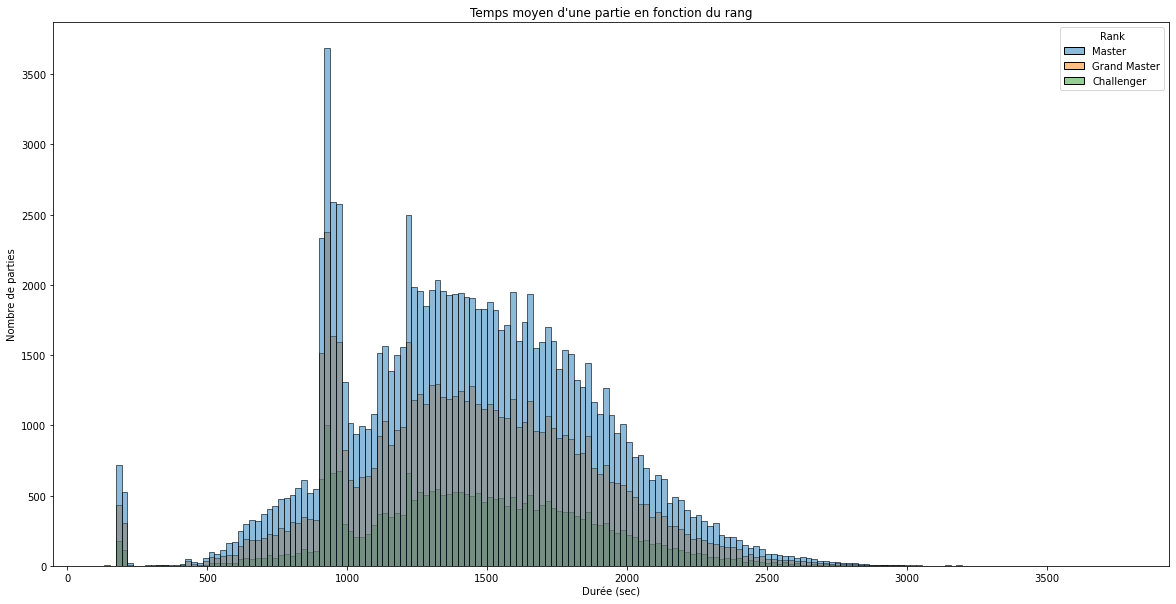

In [4]:
fig, ax1 = plt.subplots()
#plt.figure(figsize=(20,10))
fig.set_figheight(10)
fig.set_figwidth(20)

masterGameDuration = merged_data.where(merged_data['rank'] == 'master')['gameDuraton']
grandMasterGameDuration = merged_data.where(merged_data['rank'] == 'grand_master')['gameDuraton']
challengerGameDuration = merged_data.where(merged_data['rank'] == 'challenger')['gameDuraton']
print("Temps moyen d'une partie au niveau Master : {:.2f}".format(masterGameDuration.mean() / 60))
print("Temps moyen d'une partie au niveau Grand Master : {:.2f}".format(grandMasterGameDuration.mean() / 60))
print("Temps moyen d'une partie au niveau Challenger : {:.2f}".format(challengerGameDuration.mean() / 60))

sp1 = sns.histplot(merged_data, x="gameDuraton", hue="rank", hue_order=['master', 'grand_master', 'challenger'], fill=True, ax=ax1)

ax1.set_title("Temps moyen d'une partie en fonction du rang")
ax1.set_xlabel("Durée (sec)")
ax1.set_ylabel("Nombre de parties")
legend = ax1.get_legend()
handles = legend.legendHandles
legend.remove()
ax1.legend(handles, ['Master', 'Grand Master', 'Challenger'], title='Rank')

plt.show()

> On trouve ici un pique à 15 min environ car les équipes peuvent déclarer forfait à partir de ce moment là. Avec l'experience, les joueurs peuvent plus ou moins déterminer la fin de la partie au bout de 15 minutes en fonction du mental de l'équipe et du niveau de jeu proposé depuis le début de la partie.

### Pourcentage de victoire par couleur d'équipe
> Dans la communauté de League of Legend, une rumeur dit que l'équipe bleu à plus de chance de gagner face à l'équipe rouge. Ce qui par principe est assez stupide puisque la carte sur laquelle se déroule les parties est symétrique. à un détails près, le Baron Nashor est situé dans la jungle côté rouge et les dragons sont situés dans la jungle côté bleu. Cependant ils sont très rapidement accessible par l'autre équipe. (voir plan de la carte ci-dessous).

![lol_map_jungle_bosses](lol_map_jungle_bosses.png)

> Nous allons donc voir si chez les meilleurs joueurs cette théorie est justifiée.

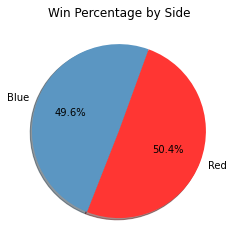

In [5]:
rates = [merged_data['blueWins'].mean(),  merged_data['redWins'].mean()]
labels = ['Blue', 'Red']
colors = ['#5B96C2', '#FF3633']

plt.pie(rates, labels=labels, colors=colors, autopct='%1.1f%%', startangle=70, shadow=True)

plt.title("Win Percentage by Side")
plt.show()

> On voit très bien que le côté dans lequel vous jouez n'impacte pas du tout la fin de la partie à ce niveau de jeu.

### Gain d'or
> Nous allons voir ici la moyenne d'or gagné lors d'une partie en cas de victoire et de défaite.

In [6]:
merged_data.describe()['blueTotalGold']

count    199925.000000
mean      47927.720850
std       16069.281604
min        3355.000000
25%       36540.000000
50%       47898.000000
75%       58824.000000
max      134323.000000
Name: blueTotalGold, dtype: float64

blue wins : 52030.787774572884
red wins 52448.22036101656
blue lose : 43890.49289974298
red lose 43524.058817596866


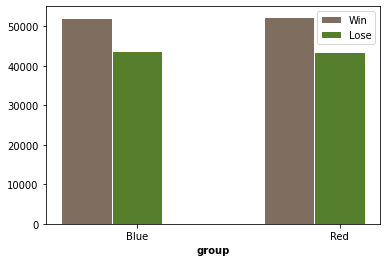

In [7]:
# set width of bars
barWidth = 0.25

blueWins = merged_data['blueWins']
redWins = merged_data['redWins']
print(f"blue wins : {merged_data.where(blueWins == 1)['blueTotalGold'].mean()}")
print(f"red wins {merged_data.where(redWins == 1)['redTotalGold'].mean()}")

print(f"blue lose : {merged_data.where(blueWins == 0)['blueTotalGold'].mean()}")
print(f"red lose {merged_data.where(redWins == 0)['redTotalGold'].mean()}")
 
# set heights of bars
winRates = [merged_data.where(blueWins == 1)['blueTotalGold'].mean(), merged_data.where(redWins == 1)['redTotalGold'].mean()]
loseRates = [merged_data.where(blueWins == 0)['blueTotalGold'].mean(), merged_data.where(redWins == 0)['redTotalGold'].mean()]
 
# Set position of bar on X axis
r1 = np.arange(len(winRates))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, winRates, color='#7f6d5f', width=barWidth, edgecolor='white', label='Win')
plt.bar(r2, loseRates, color='#557f2d', width=barWidth, edgecolor='white', label='Lose')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(winRates))], ['Blue', 'Red'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

> On voit ici que la moyenne d'or en fin de partie est quasiment identique des deux côtés.

> Avec cela on ne peut pas déterminer la fin de la partie. Il nous faudrait par contre l'avancé des golds au fur et à mesure de la partie pour définir à un temps x si vous avez plus de chance de gagner ou non en fonction de vos golds actuels.

> À partir de maintenant nous allons essayer de prédire une victoire pour l'équipe bleue

<AxesSubplot:>

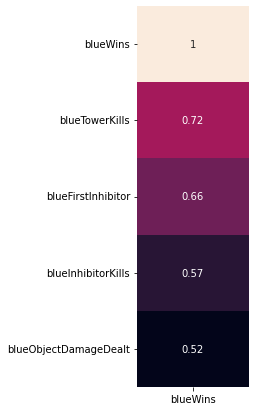

In [8]:
merged_data.drop(list(merged_data.filter(regex = 'red')), axis=1, inplace=True)

blue_corr = merged_data.corr()['blueWins'][:].sort_values(axis=0, ascending=False)

# get correlations of 0.5 or more
corr_cols = [prop for prop,corr in blue_corr.iteritems() if abs(corr)>0.5]
plt.figure(figsize=(2,7))
sns.heatmap(blue_corr[corr_cols].to_frame(), annot=True, cbar=False)

> On voit ici que seul 4 critères sont réellement pertinents pour définir une victoire de l'équipe bleue : 
* Le nombre de tour détruites (blueTowerKills)
* Si l'équipe bleue a réussi à détruire un inhibiteur en premier (blueFirstInhibitor)
* Le nombre d'inhibiteur que l'équipe bleue à détruite (blueInhibitorKills)
* Les dégats fait par les objets de l'équipe bleue (blueObjectDamageDealt)

> Nous allons donc garder que ces critères pour la suite.

In [9]:
data = pd.DataFrame(merged_data, columns=['blueWins', 'blueTowerKills', 'blueFirstInhibitor', 'blueInhibitorKills', 'blueObjectDamageDealt'])

data.head()

,blueWins,blueTowerKills,blueFirstInhibitor,blueInhibitorKills,blueObjectDamageDealt
0,0,4,0,0,35335
1,0,3,0,0,26348
2,1,9,1,2,64577
3,1,5,0,0,31303
4,0,3,0,0,30643


In [10]:
train, test = train_test_split(data, test_size=0.33, shuffle=True)

In [11]:
logreg = LogisticRegression()

X_train = train
Y_train = np.array([i==1 for i in train['blueWins']])
logreg.fit(X_train, Y_train)

LogisticRegression()

In [12]:
X_test = logreg.predict(test)
Y_test = np.array([i==1 for i in test['blueWins']])

Y_pred = logreg.predict(test)

In [13]:
print(f"Score de prediction : {logreg.score(test, Y_test)}")

Score de prediction : 1.0


In [14]:
print(f"Rapport de classification : \n\n{classification_report(Y_test, Y_pred)}")

Rapport de classification : 

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     33109
        True       1.00      1.00      1.00     32867

    accuracy                           1.00     65976
   macro avg       1.00      1.00      1.00     65976
weighted avg       1.00      1.00      1.00     65976



> Après avoir entraîné et tester notre Regression Logistique, nous avons un taux de réussite de 80%. Ce qui est plutôt normal car certaines parties sont sûrement déterminées par les critères que nous avons exclus.

> Nous ne comprenons pas pourquoi mais lors d'une execution globale nous obtenons une precision de 1.0, cependant si vous relancez les 5 dernières cases (10, 11, 12, 13 et 14 normalement) Vous obtiendrez un score de 80% ... Cela doit certainement dépendre du shuffle qui est fait.